# TFRecord Write Read Test

This is example file to understand TFRecord file write and read<BR>
It has a dependency to object_detection.utils. You need to install Object Detection API from https://github.com/tensorflow/models/tree/master/research/object_detection


In [10]:

SRC_DIR = '/Users/terrycho/dev/workspace/cifar-10/data/images'
DES_DIR = '/Users/terrycho/dev/workspace/cifar-10/data/test'
TEST_FILES = ['leptodactylus_pentadactylus_s_000004.png','camion_s_000148.png','tipper_truck_s_001250.png','american_elk_s_001521.png']
TEST_LABELS = [6,9,9,4]
TFRECORD_FILE = 'test.tfrecord'


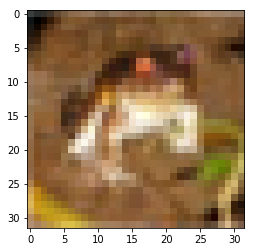

Label 6


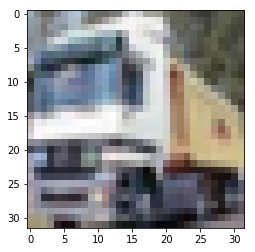

Label 9


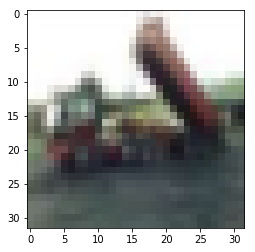

Label 9


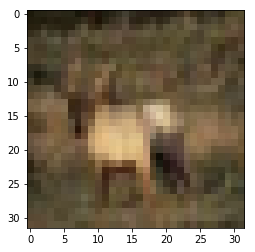

Label 4


In [11]:
# read file
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

i=0
for testfile in TEST_FILES:
    image=Image.open(SRC_DIR+'/'+testfile)
    image_array = np.array(image)

    plt.imshow(image_array)
    plt.show()
    print ('Label '+str(TEST_LABELS[i]))
    i = i+1

In [21]:
# convert it into tfrecord file
import tensorflow as tf
from object_detection.utils import dataset_util

def create_cifar_example(encoded_image_data,label):
  classes = [label]
  tf_example = tf.train.Example(features=tf.train.Features(feature={
      'image/encoded': dataset_util.bytes_feature(encoded_image_data),
      'image/label': dataset_util.int64_list_feature(classes),
  }))

  return tf_example

tfrecord_filename = DES_DIR+'/'+TFRECORD_FILE
writer = tf.python_io.TFRecordWriter(tfrecord_filename)

i =0
for testfile in TEST_FILES:
    image_file = open(SRC_DIR+'/'+testfile,'rb')
    bytes = image_file.read()
    print ('Reading :'+SRC_DIR+'/'+testfile+' size: '+str(len(bytes)) )
    tf_example = create_cifar_example(bytes,TEST_LABELS[i])
    i = i +1
    writer.write(tf_example.SerializeToString())
writer.close()

Reading :/Users/terrycho/dev/workspace/cifar-10/data/images/leptodactylus_pentadactylus_s_000004.png size: 2461
Reading :/Users/terrycho/dev/workspace/cifar-10/data/images/camion_s_000148.png size: 2643
Reading :/Users/terrycho/dev/workspace/cifar-10/data/images/tipper_truck_s_001250.png size: 2078
Reading :/Users/terrycho/dev/workspace/cifar-10/data/images/american_elk_s_001521.png size: 2315


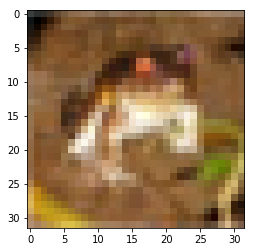

Label : SparseTensorValue(indices=array([[0]]), values=array([6]), dense_shape=array([1]))


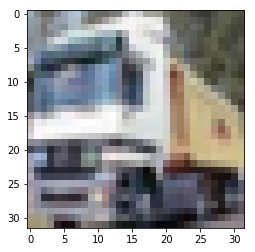

Label : SparseTensorValue(indices=array([[0]]), values=array([9]), dense_shape=array([1]))


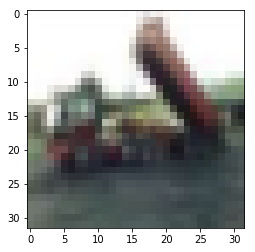

Label : SparseTensorValue(indices=array([[0]]), values=array([9]), dense_shape=array([1]))


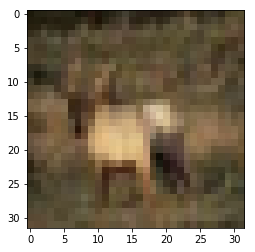

Label : SparseTensorValue(indices=array([[0]]), values=array([4]), dense_shape=array([1]))


In [22]:
# read tfrecord and print image and label

import tensorflow as tf
from PIL import Image
import io
import matplotlib.pyplot as plt

tfrecord_filename = DES_DIR+'/'+TFRECORD_FILE

def readRecord(filename_queue):
    reader = tf.TFRecordReader()
    _,serialized_example = reader.read(filename_queue)
    
    keys_to_features = {
      'image/encoded': tf.FixedLenFeature((), tf.string, default_value=''),
      'image/label': tf.VarLenFeature(tf.int64),
    }
    
    features = tf.parse_single_example(serialized_example,features= keys_to_features)
    
    encoded = tf.cast(features['image/encoded'],tf.string)
    label = tf.cast(features['image/label'],tf.int64)

    return encoded,label
    
def main():
     filename_queue = tf.train.string_input_producer([tfrecord_filename])
     encoded,label = readRecord(filename_queue)
     
     init_op = tf.global_variables_initializer()

     with tf.Session() as sess:
         sess.run(init_op)
    
         coord = tf.train.Coordinator()
         threads = tf.train.start_queue_runners(coord=coord)

         for testfile in TEST_FILES:
             encoded_value,label_value = sess.run([encoded,label])
             image = Image.open(io.BytesIO(encoded_value))
             plt.imshow(image)
             plt.show()
             print('Label : '+str(label_value))

         coord.request_stop()
         coord.join(threads)
         
main()